## This is made for calculating the resultant lenght or MRL of beacon trajectories. It needs to convert trajecotries from befor beaon to an array -shape = ( Beacon #, Seconds before *100, XYZ) - i.e 35,300,3 

In [2]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'
import sys

# to potenaitaly import system paths to get VR analysis to show up 
sys.path

['C:\\Users\\Fabian\\Desktop\\Analysis\\Multiple_trial_analysis\\Code',
 'D:\\Software\\anaconda\\python37.zip',
 'D:\\Software\\anaconda\\DLLs',
 'D:\\Software\\anaconda\\lib',
 'D:\\Software\\anaconda',
 '',
 'D:\\Software\\anaconda\\lib\\site-packages',
 'D:\\Software\\anaconda\\lib\\site-packages\\win32',
 'D:\\Software\\anaconda\\lib\\site-packages\\win32\\lib',
 'D:\\Software\\anaconda\\lib\\site-packages\\Pythonwin',
 'D:\\Software\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Fabian\\.ipython']

## 1. Import functions from previous notebooks - giving trajectories befor beacon - improve to have the whole trajectory before beacon to the time when another beacon is reached - then uneven lenghts  - can make that as list of arrays, but numpy is not made for that 

In [3]:
from Data_analysis import *

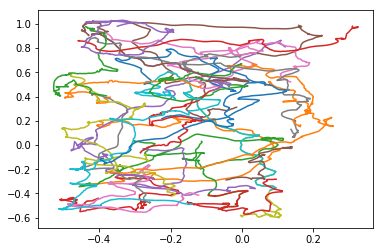

In [4]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1

dist=[]
norm_x,norm_y,norm_time = position_before_beacon_trigger_beacon(5,beacon_data,position_data)
for i in np.arange(len(norm_x)):
    plt.plot(norm_x[i],norm_y[i])
    #dist.append(calculate_Distance(norm_x[i],norm_y[i])) - cannot be indexed into ... 
    


## 2. create combined vector lenght from trajectory, 


#### np.dstack - adds an array to the third dimension - i.e out of 2,2 and 2,2 can be 2,2,2.
In this case the third dimension are the beacons and first two are time and - 500 sec and X Y. 

In [7]:
beacon_travel=[(35*[0],500*[0],3*[0])]
np.asarray(beacon_travel).shape

(1, 3)

### List of arrays solution - not working that well

In [5]:
beacon_traj=[()]
beacon_list=[()]
for norm in np.arange(len(norm_x)): 
    #rint(norm)
    #rint(norm_time[norm])
    beacon_list.append((np.array((norm_time[norm],norm_x[norm],norm_y[norm]))))
print(len(beacon_list))
print(beacon_list)
for beacon in beacon_list :
    k = np.array([beacon])
beacon_list[0]
#k.shape
#norm_x[5]

36
[(), array([], shape=(3, 0), dtype=float64), array([[ 1.58022126e+09,  1.58022126e+09,  1.58022126e+09, ...,
         1.58022127e+09,  1.58022127e+09,  1.58022127e+09],
       [-3.99041414e-01, -3.93795311e-01, -3.90387982e-01, ...,
        -4.52981830e-01, -4.61714774e-01, -4.61714774e-01],
       [ 1.93318248e-01,  1.90746605e-01,  1.88081995e-01, ...,
        -3.27113599e-01, -3.14641058e-01, -3.14641058e-01]]), array([[ 1.58022127e+09,  1.58022127e+09,  1.58022127e+09, ...,
         1.58022128e+09,  1.58022128e+09,  1.58022128e+09],
       [-3.01531106e-01, -3.02273721e-01, -3.02987397e-01, ...,
        -4.37159538e-01, -4.38864291e-01, -4.40270454e-01],
       [ 3.25264186e-02,  3.29720639e-02,  3.32570300e-02, ...,
        -3.24183494e-01, -3.24268520e-01, -3.26497704e-01]]), array([[ 1.58022130e+09,  1.58022130e+09,  1.58022130e+09, ...,
         1.58022131e+09,  1.58022131e+09,  1.58022131e+09],
       [-4.02843475e-01, -4.06367749e-01, -4.09649342e-01, ...,
        -2.60315

()

In [82]:
def position_before_beacon_trigger_beacon_array(seconds_back, beacon_data, position_data):
    """Take beacon data and returns XY and Time array defined in seconds before beacon """
    x_list=[]
    y_list=[]
    time_list=[]
    t,w,h = 35,200,3;
    beacon_travel=([[0 for x in range(w)] for y in range(h)])
    beacon_travel = np.asarray(beacon_travel)
    beacon_travel2=[]
    print (beacon_travel.shape)
    index, enum  = get_index(beacon_data, position_data)
    for index, (i, e) in enumerate(zip(index, enum)):
        x_list.append(position_data[1][i-(seconds_back*100):i])
        y_list.append(position_data[3][i-(seconds_back*100):i])
        time_list.append(position_data[0][i-(seconds_back*100):i])
        print(len((x_list)[0]))
        k= np.asarray((time_list[0],x_list[0],y_list[0],))
        #k = ((position_data[0][i-(seconds_back*100):i]),(position_data[1][i-(seconds_back*100):i]),(position_data[3][i-(seconds_back*100):i]))
        #k=np.asarray(k)
        print(k.shape)
        beacon_travel2.append(np.stack((k)))
        x_list=[]
        y_list=[]
        time_list=[]
        print(np.asarray(beacon_travel2).shape)
 #make normalized np arrays
    norm_x = np.asarray(x_list)#.reshape(len(enum),seconds_back*100)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return np.asarray(beacon_travel2)
beacon_travel= position_before_beacon_trigger_beacon_array(2, beacon_data, position_data)

(3, 200)
200
(3, 200)
(1, 3, 200)
200
(3, 200)
(2, 3, 200)
200
(3, 200)
(3, 3, 200)
200
(3, 200)
(4, 3, 200)
200
(3, 200)
(5, 3, 200)
200
(3, 200)
(6, 3, 200)
200
(3, 200)
(7, 3, 200)
200
(3, 200)
(8, 3, 200)
200
(3, 200)
(9, 3, 200)
200
(3, 200)
(10, 3, 200)
200
(3, 200)
(11, 3, 200)
200
(3, 200)
(12, 3, 200)
200
(3, 200)
(13, 3, 200)
200
(3, 200)
(14, 3, 200)
200
(3, 200)
(15, 3, 200)
200
(3, 200)
(16, 3, 200)
200
(3, 200)
(17, 3, 200)
200
(3, 200)
(18, 3, 200)
200
(3, 200)
(19, 3, 200)
200
(3, 200)
(20, 3, 200)
200
(3, 200)
(21, 3, 200)
200
(3, 200)
(22, 3, 200)
200
(3, 200)
(23, 3, 200)
200
(3, 200)
(24, 3, 200)
200
(3, 200)
(25, 3, 200)
200
(3, 200)
(26, 3, 200)
200
(3, 200)
(27, 3, 200)
200
(3, 200)
(28, 3, 200)
200
(3, 200)
(29, 3, 200)
200
(3, 200)
(30, 3, 200)
200
(3, 200)
(31, 3, 200)
200
(3, 200)
(32, 3, 200)
200
(3, 200)
(33, 3, 200)
200
(3, 200)
(34, 3, 200)
200
(3, 200)
(35, 3, 200)


In [198]:
def position_before_beacon_trigger_beacon_array(seconds_back, beacon_data, position_data):
    """Take beacon data and returns XY and Time array defined in seconds before beacon """
    x_list=[]
    y_list=[]
    time_list=[]
    t,w,h = 35,200,3;
    beacon_travel=([[0 for x in range(w)] for y in range(h)])
    beacon_travel = np.asarray(beacon_travel)
    beacon_travel2=[]
    index, enum  = get_index(beacon_data, position_data)
    for index, (i, e) in enumerate(zip(index, enum)):
        x_list.append(position_data[1][i-(seconds_back*100):i])
        y_list.append(position_data[3][i-(seconds_back*100):i])
        time_list.append(position_data[0][i-(seconds_back*100):i])
        k= np.asarray((time_list[0],x_list[0],y_list[0],))
        #k = ((position_data[0][i-(seconds_back*100):i]),(position_data[1][i-(seconds_back*100):i]),(position_data[3][i-(seconds_back*100):i]))
        #k=np.asarray(k)
        beacon_travel2.append(k)
        x_list=[]
        y_list=[]
        time_list=[]
 #make normalized np arrays
    norm_x = np.asarray(x_list)#.reshape(len(enum),seconds_back*100)
    norm_y = np.asarray(y_list)
    norm_time = np.asarray(time_list)
    return np.asarray(beacon_travel2)
beacon_travel= position_before_beacon_trigger_beacon_array(2, beacon_data, position_data)

In [126]:
b= beacon_travel.reshape(200,3,35)
b[:,0,3]

array([ 1.58022119e+09,  1.58022119e+09,  1.30101845e-01, -2.51964122e-01,
        4.42810357e-02, -3.01598281e-01,  1.58022127e+09,  1.58022127e+09,
        5.02325110e-02, -2.58356422e-01, -1.99591160e-01, -2.55233467e-01,
        1.58022128e+09,  1.58022128e+09, -3.17395151e-01, -4.32415426e-01,
       -2.15390220e-01, -3.17961991e-01,  1.58022131e+09,  1.58022131e+09,
       -1.76646292e-01, -5.15437961e-01, -3.46707433e-01,  1.58022132e+09,
        1.58022132e+09, -2.76561171e-01,  3.60770002e-02,  3.29957992e-01,
        7.90404737e-01,  1.58022138e+09,  1.58022139e+09,  1.67851582e-01,
        1.19880820e-02,  9.15451825e-01,  7.40490079e-01,  1.58022139e+09,
        1.58022139e+09, -6.85693249e-02,  5.98777831e-02,  5.56431353e-01,
        1.58022150e+09,  1.58022150e+09, -1.43402651e-01, -1.14505649e-01,
        6.15403414e-01,  7.30175138e-01,  1.58022157e+09,  1.58022157e+09,
        9.41772200e-03, -1.44841880e-01,  7.53205270e-02,  5.38523018e-01,
        1.58022157e+09,  

In [123]:
print(beacon_travel.shape)
beacon_travel[1,0,0]

(35, 3, 200)


1580221269.27

### Looking at time if it is the correct array... 

In [120]:
diff=[]
for i in range (199):
    diff.append(beacon_travel[1,0,i]-beacon_travel[1,0,i+1])
    
(sum(diff))

-3.309999942779541

# beacon_traj=[()]
for norm in np.arange(len(norm_x)): 
    beacon_traj = (np.append((norm_x[norm],norm_y[norm],norm_time[norm])))   
print(len(beacon_traj))
beacon_traj = beacon_traj.reshape(35,500,3)

In [150]:
len(beacon_travel[1,1,:])

200

In [186]:
print(beacon_travel.shape)

(35, 3, 200)


## Sanity check - checkt trajectories and how they look in real

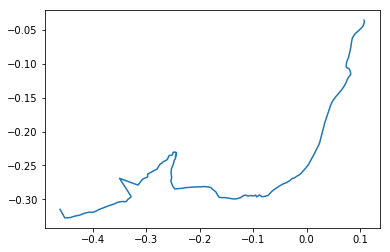

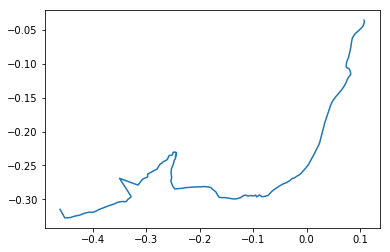

In [185]:
seconds_back = 2
index, enum  = get_index(beacon_data, position_data)
plt.plot(beacon_travel[1,1,:],beacon_travel[1,2,:])
plt.show()
plt.plot((position_data[1][index[1]-(seconds_back*100):index[1]]),(position_data[3][index[1]-(seconds_back*100):index[1]]))


## 3. create lenght of trajectory form start to end - i.e straight line 

In [154]:
straights=[]
longs=[]
for beacon in range(len(beacon_travel)):
    longs.append(calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:]))
    straights.append(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
print(longs)
print(straights)

[0.9425212929675251, 0.8992250817907976, 1.0451292776167822, 0.7298104159078862, 0.9639411228120258, 0.8735309613070112, 0.7976764885391235, 0.3615776410591762, 0.9105926435860787, 0.6402207191567367, 0.3367075835314924, 0.5707787002131445, 0.43547921017590346, 0.710380894831434, 0.5217613049029717, 0.4433208681865102, 0.6448606989626087, 0.49072026707807004, 0.5481991105152336, 0.4744112293886832, 0.5121877453385345, 0.5723184609740728, 0.602143473841614, 0.4027406858126442, 0.7317035422423155, 0.27346399022213524, 0.5469084136533082, 0.8435006345924804, 0.6288253968544808, 0.624773356802325, 0.6589331129979741, 0.6252099074902522, 0.6778590035843292, 0.5147305069373675, 0.7082796845920301]
[0.7980196521159146, 0.6338175951668515, 0.6723426078618651, 0.25553641862931636, 0.7656112938926819, 0.22033463746742515, 0.2935359985291616, 0.18707563100303468, 0.7608701645721002, 0.09010372153476748, 0.2216893391461585, 0.3921728410250207, 0.06800890528624243, 0.3134454167136716, 0.32944363155

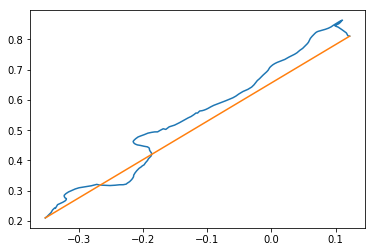

In [155]:
beacon = 4
plt.plot(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:])
plt.plot([beacon_travel[beacon,1,0], beacon_travel[beacon,1,-1]] ,([beacon_travel[beacon,2,0],beacon_travel[beacon,2,-1]]))
    

## Sanity check: ratios seemed to have very small differences. - not sure why, plottign them revesl ok trajectories 

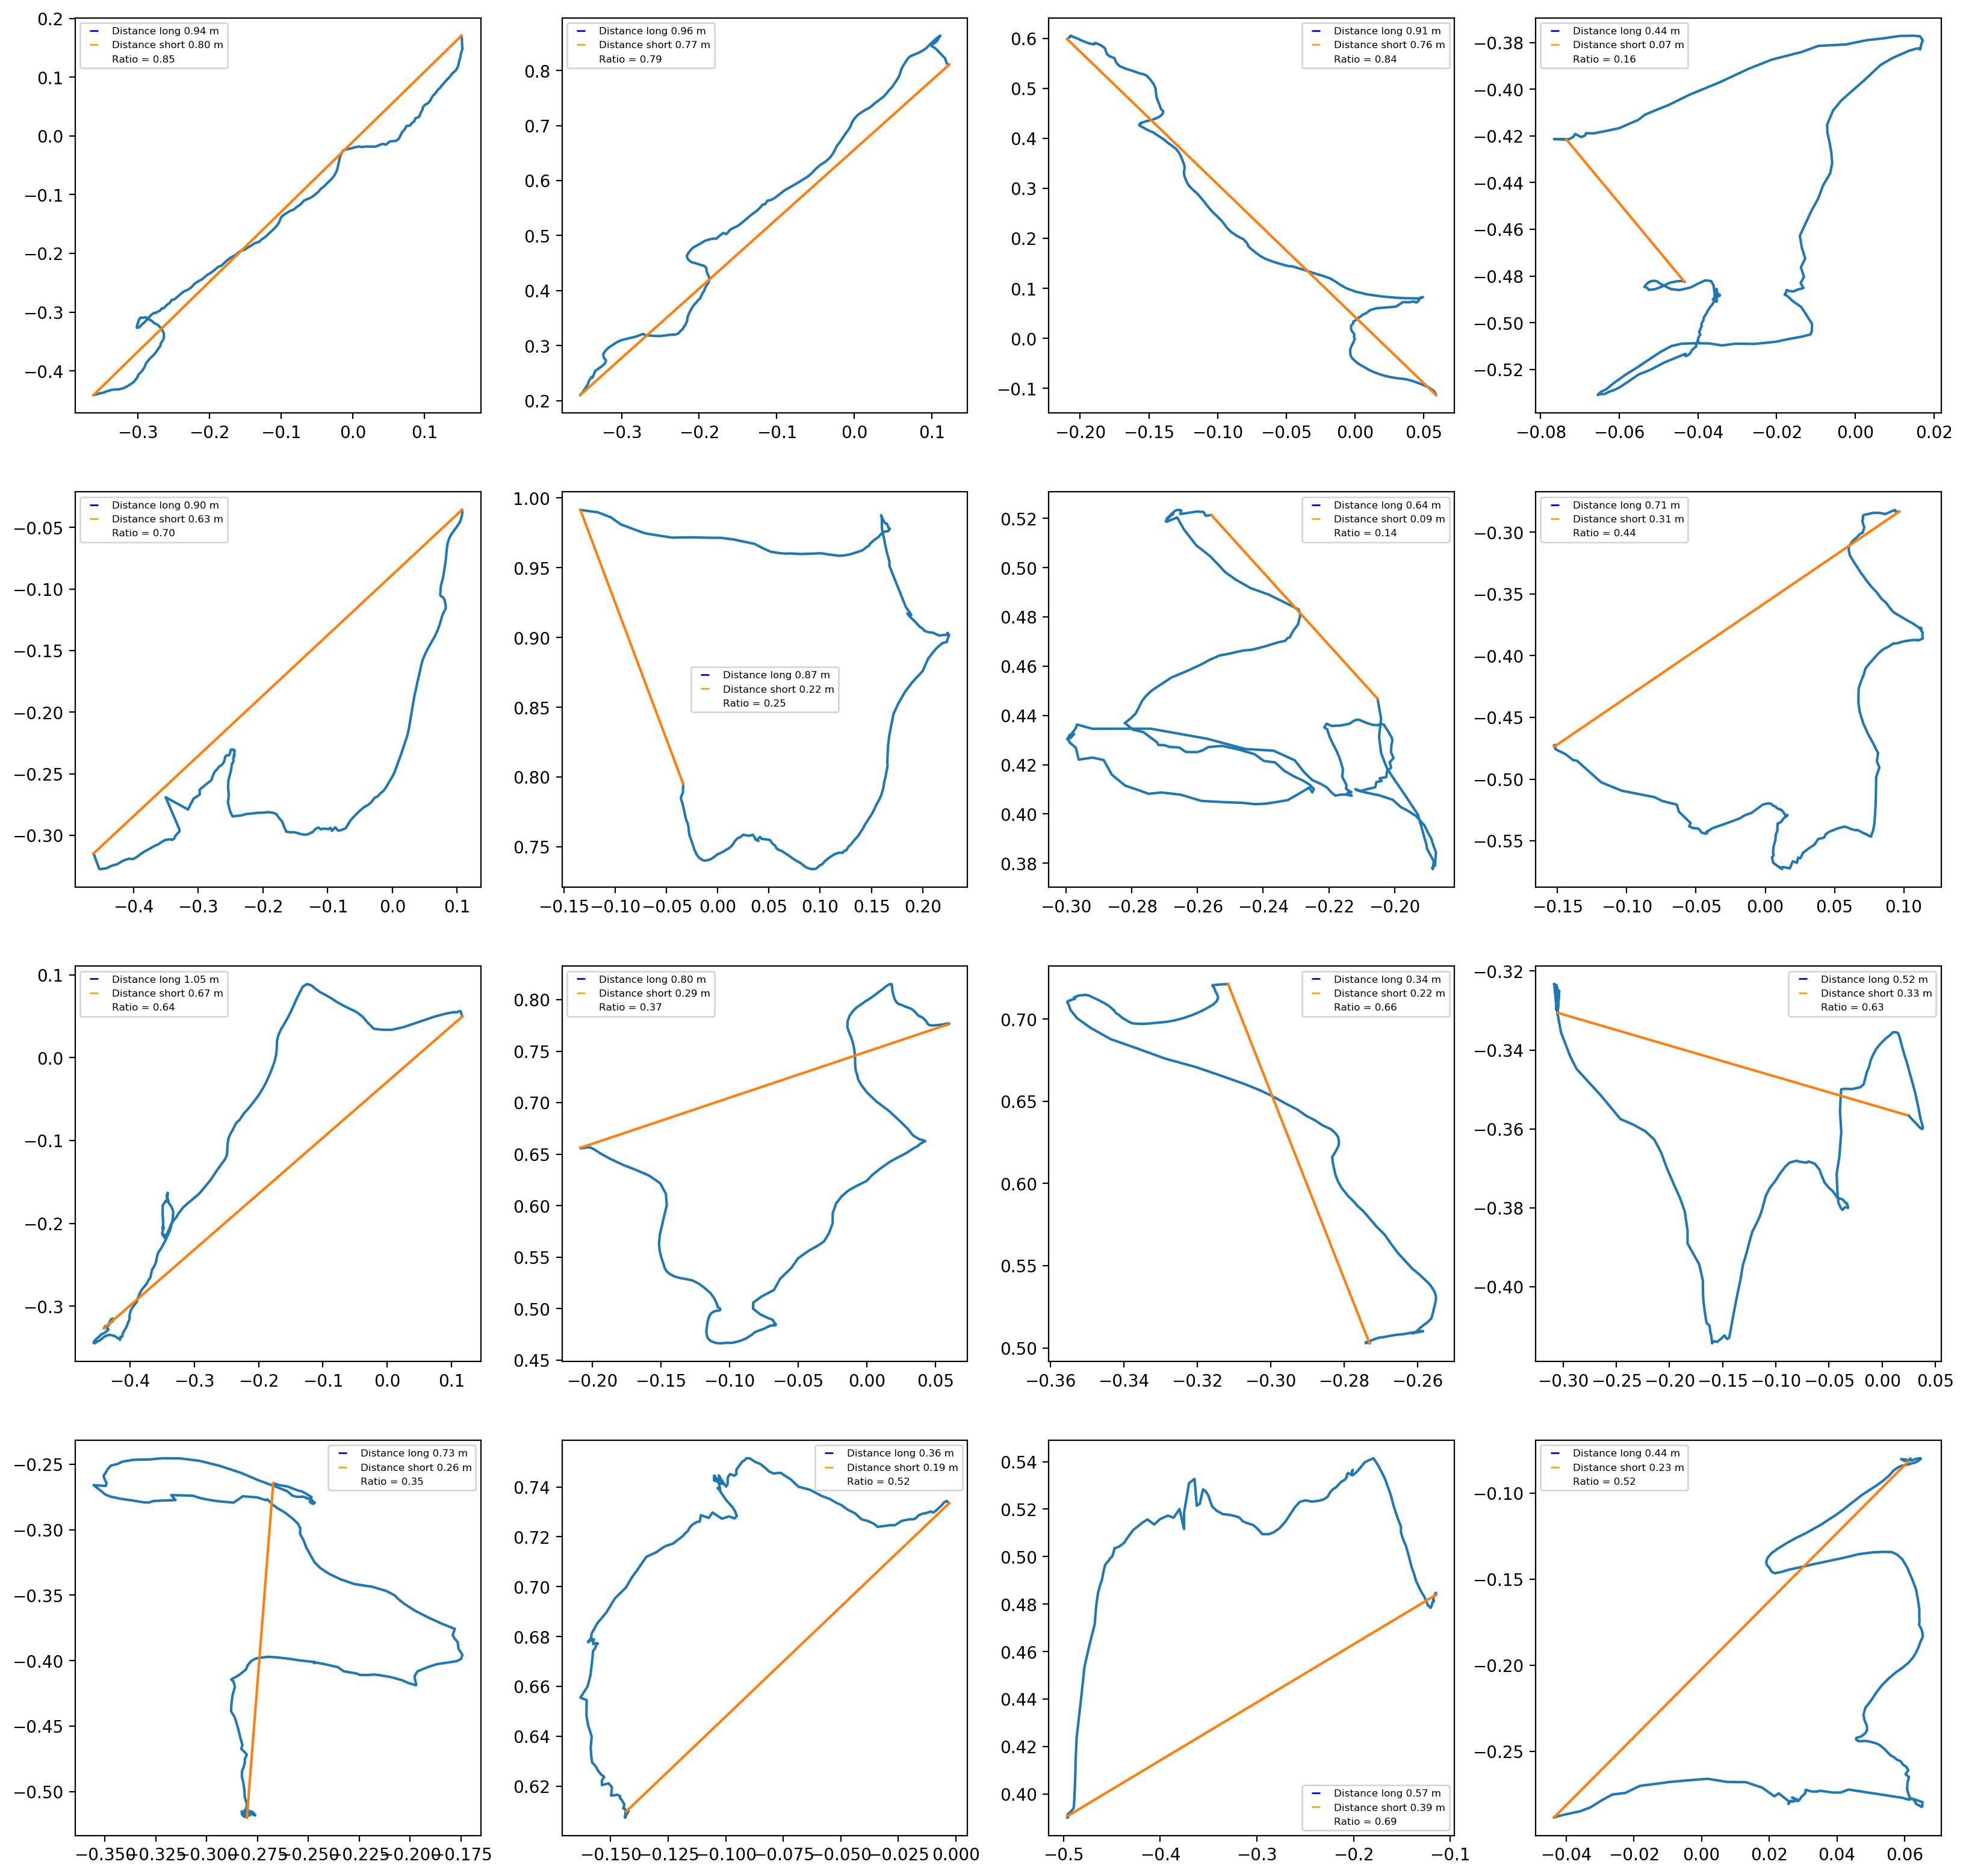

In [156]:
fig,ax = plt.subplots(4,4,figsize=(20,20),dpi=200)
num=0
h=0
for beacon in range(16): 
    s=(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
    
    l=calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:])
    
    ax[h][num].plot(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:])
    ax[h][num].plot([beacon_travel[beacon,1,0], beacon_travel[beacon,1,-1]] ,([beacon_travel[beacon,2,0],beacon_travel[beacon,2,-1]]))
    
    
    distl = mlines.Line2D([], [], marker='_',markersize=5,markerfacecolor="blue",
                            markeredgecolor="blue",linewidth = 0, label='Distance long %.2f m' %l)
    dists = mlines.Line2D([], [], marker='_',markersize=5,markerfacecolor="orange",
                            markeredgecolor="orange",linewidth = 0, label='Distance short %.2f m' %s)
    diff = mlines.Line2D([], [], marker=" ",linewidth = 0, label='Ratio = %.2f ' %(s/l))
    
        
    ax[h][num].legend(handles=[distl,dists,diff],loc='best',prop={'size': 6})
    
    l=0
    s=0
    h+=1
    if h % 4==0:
        num += 1
        h=0
plt.savefig('%s16_trajectories_2_sec._before_beacons_.png' %(figures), dpi = 100)    
plt.show()


## 4. combine the two arrays into one - 0th column lenght of trajectory, 1st column lenght of straight line 

In [157]:
resultant= (np.asarray(longs),np.asarray(straights))
np.asarray(resultant).shape

(2, 35)

In [158]:
resultant[1]

array([0.79801965, 0.6338176 , 0.67234261, 0.25553642, 0.76561129,
       0.22033464, 0.293536  , 0.18707563, 0.76087016, 0.09010372,
       0.22168934, 0.39217284, 0.06800891, 0.31344542, 0.32944363,
       0.23198939, 0.36635341, 0.32151932, 0.39473299, 0.35929538,
       0.36246221, 0.30164982, 0.34874497, 0.30319908, 0.57695062,
       0.07306677, 0.40033353, 0.63386126, 0.42126765, 0.43950727,
       0.52728193, 0.52208147, 0.39784132, 0.42323131, 0.18487833])

In [206]:
def ratios (list1,list2):
    resultant= (np.asarray(list1),np.asarray(list2))
    div = []
    for i in range(len(resultant[1])):
        div.append(resultant[1][i]/resultant[0][i])
    return np.asarray(div)
ratios(longs,straights)

array([0.84668607, 0.70484866, 0.64331047, 0.35014082, 0.7942511 ,
       0.25223449, 0.36798878, 0.51738717, 0.83557688, 0.14073853,
       0.65840317, 0.68708387, 0.15617027, 0.44123571, 0.63140679,
       0.52329905, 0.56811248, 0.65519879, 0.72005405, 0.75735008,
       0.70767451, 0.52706638, 0.57917254, 0.75283945, 0.78850324,
       0.26718973, 0.73199372, 0.75146507, 0.66992786, 0.70346672,
       0.80020555, 0.8350499 , 0.58690866, 0.82223863, 0.26102446])

## 5. Plot as a into a histogram,

0.6304094781022669
0.5699313554838507


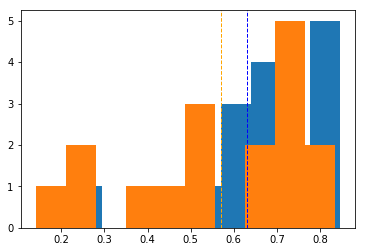

In [192]:
div=np.asarray(div)
plt.hist(div[::2])
plt.hist(div[1::2])
np.mean(div[::2])
plt.axvline(div[::2].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(div[1::2].mean(), color='orange', linestyle='dashed', linewidth=1)
print(div[0::2].mean())
print(div[1::2].mean())


## 6.Make a function out of it

#### This function takes beaocn and position and graphs the perentage of lenght of trajecotries for a visibel and invisible beacon 



0.6304094781022669
0.5699313554838507


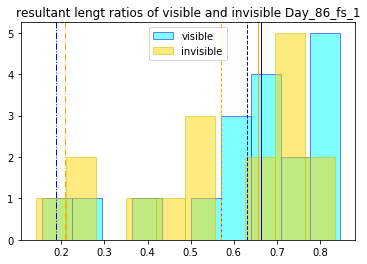

In [237]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1

def resultant_lenght_vis_invis(position_data, beacon_data,seconds_back,name):
    beacon_travel = position_before_beacon_trigger_beacon_array(seconds_back, beacon_data, position_data)
    straights=[]
    longs=[]
    for beacon in range(len(beacon_travel)):
        longs.append(calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:]))
        straights.append(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
    div = ratios(longs,straights)

    plt.hist(div[::2],alpha=.5,color='cyan', edgecolor='blue',label='visible')
    plt.hist(div[1::2],alpha=.5,color='gold', edgecolor='y', label='invisible')
    plt.legend()
    np.mean(div[::2])
    plt.axvline(div[::2].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(div[1::2].mean(), color='orange', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(div[::2]), color='blue', linestyle='solid', linewidth=1)
    plt.axvline(np.median(div[1::2]), color='orange', linestyle='solid', linewidth=1)
    plt.axvline(np.std(div[::2]), color='blue', linestyle='dashdot', linewidth=1)
    plt.axvline(np.std(div[1::2]), color='orange', linestyle='dashdot', linewidth=1)
    print(div[0::2].mean())
    print(div[1::2].mean())
    plt.title('resultant lengt ratios of visible and invisible %s'%name)

    
resultant_lenght_vis_invis(position_data,beacon_data,2,'Day_86_fs_1')


0.49347385827093987
0.394206727884158


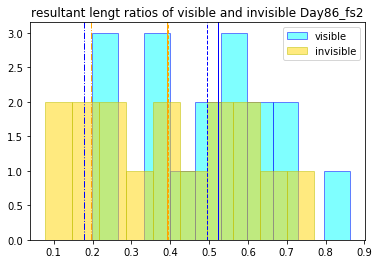

In [238]:
resultant_lenght_vis_invis(Day86_fs2 ,beacon_Day86_fs2,3,'Day86_fs2')

0.3918050483046605
0.44519153469238676


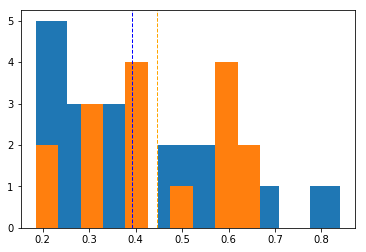

In [212]:
resultant_lenght_vis_invis(Day87_fs2 ,beacon_Day87_fs2,3)

0.44254338305439506
0.45008032906447454


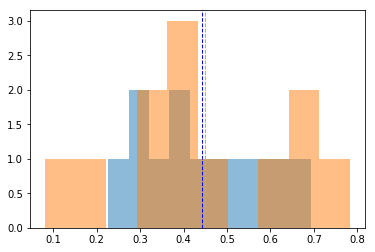

In [217]:
resultant_lenght_vis_invis(Day88_fs2 ,beacon_Day88_fs2,3)

0.5123835304764198
0.42746515034854227


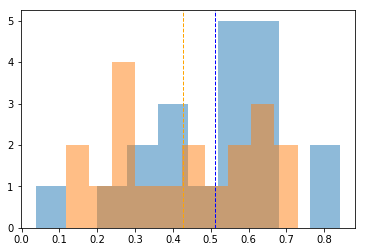

In [218]:
resultant_lenght_vis_invis(Day88_fs1 ,beacon_Day88_fs1,3)

In [ ]:
def plot_something(data, ax=None, **kwargs):
    ax = ax or plt.gca()
    # Do some cool data transformations...
    return ax.boxplot(data, **kwargs)